<a href="https://colab.research.google.com/github/bullyhunter1917/Studies/blob/main/NN-and-NLP/NN_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 07.03.2023
- remaining points: last lab session before or on Thursday, 16.03.2023

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).
Make sure you know all the questions and asnwers, and that the notebook contains results; bfore presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with suchr calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

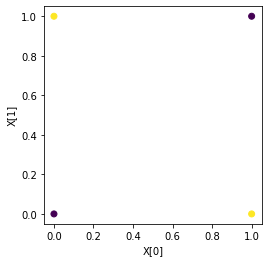

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden, ), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        pass

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X@self.W1.T+self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1@self.W2.T+self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = Y*np.log(O2) + (1-Y)*np.log(1 - O2)# TODO cross-entropy loss
            # normalize loss by batch size
            loss = - loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            O2_grad = (O2-Y)/(O2-np.square(O2))
            A2_grad = O2_grad*(sigmoid(A2)*(1 - sigmoid(A2)))
            self.b2_grad = A2_grad.sum(0)/X.shape[0]
            self.W2_grad = np.array([(O1*A2_grad).sum(0)/X.shape[0]])
            O1_grad = self.W2*A2_grad
            A1_grad = O1_grad*(sigmoid(A1)*(1 - sigmoid(A1)))
            self.b1_grad = A1_grad.sum(0)/X.shape[0]
            self.W1_grad = np.zeros(self.W1.shape)
            for i in range(X.shape[0]):
                self.W1_grad += (X[i][:, np.newaxis]*A1_grad[i]).T  
            self.W1_grad /= X.shape[0]

        return O2, loss

In [ ]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem



net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([[20, 20], [-20, -20]])
net.b1 = np.array([[-10, 30]])
net.W2 = np.ones((1,2))*20
net.b2 = np.array([[-30]])

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large

predictions, loss = net.forward(X, Y, do_backward=True)
print(loss)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

4.546077501637665e-05
XORnet([0. 0.]) = 4.543910487654591e-05
XORnet([0. 1.]) = 0.999954519621495
XORnet([1. 0.]) = 0.999954519621495
XORnet([1. 1.]) = 4.543910487654575e-05


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param[:] - alpha*getattr(net, param_name + '_grad')

after 0 steps 	loss=0.7026127050668588
after 5000 steps 	loss=0.041810541367591145
after 10000 steps 	loss=0.010635415218058929
after 15000 steps 	loss=0.0057148634568882795
after 20000 steps 	loss=0.0038262611962083005
after 25000 steps 	loss=0.0028461615180759873
after 30000 steps 	loss=0.002251853069875771
after 35000 steps 	loss=0.0018553123342797077
after 40000 steps 	loss=0.0015729991167978711
after 45000 steps 	loss=0.0013623534926643765
after 50000 steps 	loss=0.0011994962439535232
after 55000 steps 	loss=0.0010700295669435575
after 60000 steps 	loss=0.0009647738517922701
after 65000 steps 	loss=0.0008776092816259686
after 70000 steps 	loss=0.0008043041519806899
after 75000 steps 	loss=0.0007418418595156353
after 80000 steps 	loss=0.0006880158180248959
after 85000 steps 	loss=0.0006411758454017326
after 90000 steps 	loss=0.0006000639502067978
after 95000 steps 	loss=0.0005637048662119873


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.0003055298272821474
XORnet([0. 1.]) = 0.9996220640425268
XORnet([1. 0.]) = 0.9993536254684121
XORnet([1. 1.]) = 0.00079484133934034


In [ ]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = np.array(np.meshgrid([0, 1], [0, 1], [0, 1])).T.reshape(-1,3)
Y3 = np.logical_xor(np.logical_xor(X3[:,0],X3[:,1]), X3[:,2]).astype(int)[:, np.newaxis]


for hidden_dim in [2, 3, 5, 10, 20]:
    print(f'Hudden_dim number: {hidden_dim}')
    # TODO: run a few trainings and record the fraction of successful ones
    net = SmallNet(3, hidden_dim, dtype=np.float64)
    
    for i in range(100000):
      _, loss = net.forward(X3, Y3, do_backward=True)
      if (i % 5000) == 0:
          print(f"after {i} steps \tloss={loss}")
      for param_name in ["W1", "b1", "W2", "b2"]:
          param = getattr(net, param_name)
          # Hint: use the construct `param[:]` to change the contents of the array!
          # Doing instead `param = new_val` simply changes to what the variable
          # param points to, without affecting the network!
          # alternatively, you could do setattr(net, param_name, new_value)
          param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
    pass

Hudden_dim number: 2
after 0 steps 	loss=0.7110607254814478
after 5000 steps 	loss=0.693207422319511
after 10000 steps 	loss=0.6930917791417205
after 15000 steps 	loss=0.6928017751026287
after 20000 steps 	loss=0.6750552931566346
after 25000 steps 	loss=0.28086017678204334
after 30000 steps 	loss=0.14108915521978377
after 35000 steps 	loss=0.09052288467497333
after 40000 steps 	loss=0.06579840236599296
after 45000 steps 	loss=0.05140414988106337
after 50000 steps 	loss=0.042061505738982416
after 55000 steps 	loss=0.03553649034872278
after 60000 steps 	loss=0.03073378642880377
after 65000 steps 	loss=0.027056993241834054
after 70000 steps 	loss=0.02415493572306482
after 75000 steps 	loss=0.021807922863942092
after 80000 steps 	loss=0.019871727396070443
after 85000 steps 	loss=0.018247868729510255
after 90000 steps 	loss=0.016866872307713422
after 95000 steps 	loss=0.01567835864999345
Hudden_dim number: 3
after 0 steps 	loss=0.7044630792246446
after 5000 steps 	loss=0.6931664052085303
af

## Problem 4


In [ ]:
X3 = np.array(np.meshgrid([0, 1], [0, 1], [0, 1])).T.reshape(-1,3)
Y3 = np.logical_xor(np.logical_xor(X3[:,0],X3[:,1]), X3[:,2]).astype(int)[:, np.newaxis]

In [ ]:
class SmallNet4:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden, ), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        pass

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X@self.W1.T+self.b1
        # Outputs after the sigmoid non-linearity
        O1 = np.maximum(A1, 0)
        # Inputs to neuron in the second layer
        A2 = O1@self.W2.T+self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = Y*np.log(O2) + (1-Y)*np.log(1 - O2)# TODO cross-entropy loss
            # normalize loss by batch size
            loss = - loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            O2_grad = (O2-Y)/(O2-np.square(O2))
            A2_grad = O2_grad*(sigmoid(A2)*(1- sigmoid(A2)))
            self.b2_grad = A2_grad.sum(0)/X.shape[0]
            self.W2_grad = np.array([(O1*A2_grad).sum(0)/X.shape[0]])
            O1_grad = self.W2*A2_grad
            A1_grad = O1_grad*(A1 > 0).astype(int)
            self.b1_grad = A1_grad.sum(0)/X.shape[0]
            self.W1_grad = np.zeros(self.W1.shape)
            for i in range(X.shape[0]):
                self.W1_grad += (X[i][:, np.newaxis]*A1_grad[i]).T  
            self.W1_grad /= X.shape[0]

        return O2, loss

Average loss function value after 20k iterations for diffrent hidden layer size.
We can see that bigger hidden layer have better socre.

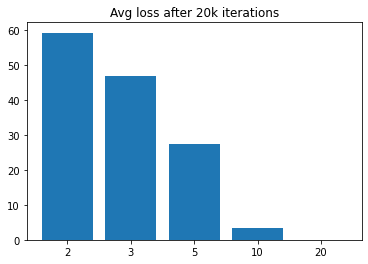

In [ ]:
alpha = 0.1  # set a learning rate

array = np.array([2, 3, 5, 10, 20])
result = np.zeros((5,))

for hidden_dim in range(len(array)):
    for iter in range(100):
        net = SmallNet4(3, array[hidden_dim], dtype=np.float64)
        for i in range(20000):
            _, loss = net.forward(X3, Y3, do_backward=True)
            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
        result[hidden_dim] += loss

plt.title('Avg loss after 20k iterations')
plt.bar(array.astype(str), result)
plt.show()

To see diffrences better I multyply result by 100

## Problem 5

In [ ]:
class SmallNet5:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden, ), dtype=dtype)
        self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_hidden,), dtype=dtype)
        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)
        self.W3 = np.random.normal(0, 0.5, self.W3.shape)
        self.b3 = np.random.normal(0, 0.5, self.b3.shape)
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        pass

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X@self.W1.T+self.b1
        # Outputs after the sigmoid non-linearity
        O1 = np.maximum(A1, 0)
        # Inputs to neuron in the second layer
        A2 = O1@self.W2.T+self.b2
        # Outputs after the sigmoid non-linearity
        O2 = np.maximum(A2, 0)

        A3 = O2@self.W3.T+self.b3

        O3 = sigmoid(A3)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = Y*np.log(O3) + (1-Y)*np.log(1 - O3)# TODO cross-entropy loss
            # normalize loss by batch size
            loss = - loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            
            # Output layer
            O3_grad = (O3-Y)/(O3-np.square(O3))
            A3_grad = O3_grad*(sigmoid(A3)*(1 - sigmoid(A3)))
            self.b3_grad = A3_grad.sum(0)/X.shape[0]
            self.W3_grad = np.array([(O2*A3_grad).sum(0)/X.shape[0]])
            
            # 2 Hidden layer
          
            O2_grad = self.W3*A3_grad
            A2_grad = O2_grad*(A2 > 0).astype(int)
            self.b2_grad = A2_grad.sum(0)/X.shape[0]
            self.W2_grad = np.zeros(self.W2.shape)
            for i in range(X.shape[0]):
                self.W2_grad += (O1[i][:, np.newaxis]*A2_grad[i]).T  
            self.W2_grad /= X.shape[0]

            # 1 Hidden layer
            O1_grad = np.zeros((O1.shape))
            for i in range(self.W1.shape[0]):
                O1_grad += A2_grad[:,i][:, np.newaxis]@self.W2[i].reshape(1,self.W2.shape[0])
            #O1_grad /= self.W1.shape[0]

            A1_grad = O1_grad*(A1 > 0).astype(int)
            self.b1_grad = A1_grad.sum(0)/X.shape[0]
            self.W1_grad = np.zeros(self.W1.shape)
            for i in range(X.shape[0]):
                self.W1_grad += (X[i][:, np.newaxis]*A1_grad[i]).T
            self.W1_grad /= X.shape[0]

        return O2, loss

Loss function for 3DXor problem on 2 hidden layers every have size of 20

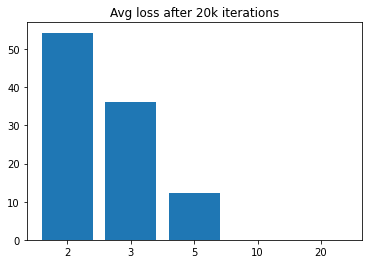

In [ ]:
alpha = 0.1  # set a learning rate

array = np.array([2, 3, 5, 10, 20])
result = np.zeros((5,))

for hidden_dim in range(len(array)):
    for iter in range(100):
        net = SmallNet5(3, array[hidden_dim], dtype=np.float64)
        for i in range(20000):
            _, loss = net.forward(X3, Y3, do_backward=True)
            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")
            for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
                param = getattr(net, param_name)
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
        result[hidden_dim] += loss

plt.title('Avg loss after 20k iterations')
plt.bar(array.astype(str), result)
plt.show()

Last loss value: 1.2371485144426052e-05


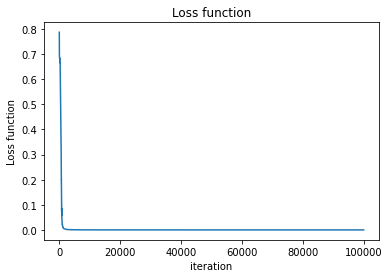

In [ ]:
net = SmallNet5(3, 3, dtype=np.float64)

alpha = 0.1  # set a learning rate

result = np.zeros((100000,))

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
    result[i] = loss

plt.title("Loss function")
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.plot(np.arange(100000), result)

print(f'Last loss value: {result[99999]}')

## Problem 6

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


class SmallNet6:
    def __init__(self, in_features, number_of_hidden_layers, num_hidden, dtype=np.float32):
        self.n_hidden_l = number_of_hidden_layers
        self.size_hidden = num_hidden
        self.W0 = np.zeros((num_hidden, in_features))
        #hidden layers
        self.W1 = np.zeros((number_of_hidden_layers-1, num_hidden, num_hidden), dtype=dtype)
        self.b1 = np.zeros((number_of_hidden_layers, num_hidden), dtype=dtype)
        # output layer 
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W0 = np.random.normal(0, 0.5, self.W0.shape)
        self.W1 = np.random.normal(0, 0.5, self.W1.shape)
        self.b1 = np.random.normal(0, 0.5, self.b1.shape)
        self.W2 = np.random.normal(0, 0.5, self.W2.shape)
        self.b2 = np.random.normal(0, 0.5, self.b2.shape)
        
        pass

    def forward(self, X, Y=None, do_backward=False):
        
        A1 = np.zeros((self.n_hidden_l, X.shape[0], self.size_hidden))
        O1 = np.zeros((self.n_hidden_l, X.shape[0], self.size_hidden))
        
        # Calculating first hidden layer
        A1[0] = X@self.W0.T+self.b1[0] # X x n
        #O1[0] = sigmoid(A1[0])  # X x n
        O1[0] = np.maximum(A1[0], 0)

        # Calculating rest of hidden layers
        for i in range(1, self.n_hidden_l):
            A1[i] = O1[i-1]@self.W1[i-1].T+self.b1[i] # X x n
            #O1[i] = sigmoid(A1[i]) # X x n
            O1[i] = np.maximum(A1[i], 0)

        #A1 = X@self.W1.T+self.b1
        
        #O1 = sigmoid(A1)
        
        # Calculating output layer
        A2 = O1[-1]@self.W2.T+self.b2 # X x 1        
        O2 = sigmoid(A2)  # X x 1

        
        if Y is not None:
            loss = Y*np.log(O2) + (1-Y)*np.log(1 - O2)
            # normalize loss by batch size
            loss = - loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # Calculating gradient for output layer
            O2_grad = (O2-Y)/(O2-np.square(O2)) # X x 1
            A2_grad = O2_grad*(sigmoid(A2)*(1 - sigmoid(A2))) # X x 1
            self.b2_grad = A2_grad.sum(0)/X.shape[0]
            self.W2_grad = np.array([(O1[-1]*A2_grad).sum(0)/X.shape[0]])
            
            # Init grad tables
            A1_grad = np.zeros((self.n_hidden_l, X.shape[0], self.size_hidden))
            O1_grad = np.zeros((self.n_hidden_l, X.shape[0], self.size_hidden))
            self.W1_grad = np.zeros(self.W1.shape)
            self.b1_grad = np.zeros(self.b1.shape)

            O1_grad[-1] = self.W2*A2_grad
            #For sigmoid function
            #A1_grad[-1] = O1_grad[-1]*(sigmoid(A1[-1])*(1 - sigmoid(A1[-1])))
            
            #For ReLu function
            A1_grad[-1] = O1_grad[-1]*(A1[-1] > 0).astype(int)
            
            # Calculating whole O1_grad and A1_grad to calculate b_grad and W_grad in next loop
            # ----------------------------------------------------------------------------------
            for i in range(1, self.n_hidden_l):
                for j in range(self.size_hidden):
                    O1_grad[self.n_hidden_l-1-i] += A1_grad[self.n_hidden_l-i][:, j][:, np.newaxis]@self.W1[self.n_hidden_l-1-i][j].reshape(1,self.W1.shape[1])
                
                #For sigmoid function
                #A1_grad[self.n_hidden_l-1-i] = O1_grad[self.n_hidden_l-1-i]*(sigmoid(A1[self.n_hidden_l-1-i]) * (1 - sigmoid(A1[self.n_hidden_l-1-i])))

                #For ReLu function
                A1_grad[self.n_hidden_l-1-i] = O1_grad[self.n_hidden_l-1-i]*(A1[self.n_hidden_l-1-i] > 0).astype(int)


            # print(O1_grad[0])
            # print(A1_grad[0])

            # Calculating W1_grad and b1_grad
            
            for i in range(self.W1.shape[0]):
                for j in range(X.shape[0]):
                    self.W1_grad[i] += (O1[i][j][:, np.newaxis]*A1_grad[i+1][j]).T 
            
            self.W1_grad /= X.shape[0]
            for i in range(self.b1.shape[0]):
                self.b1_grad[i] = A1_grad[i].sum(0)/X.shape[0] 
              
            

            self.W0_grad = np.zeros(self.W0.shape)
            for i in range(X.shape[0]):
                self.W0_grad += (X[i][:, np.newaxis]*A1_grad[0][i]).T
            self.W0_grad /= X.shape[0]

        return O2, loss

Last loss value: 2.071008353885128e-06


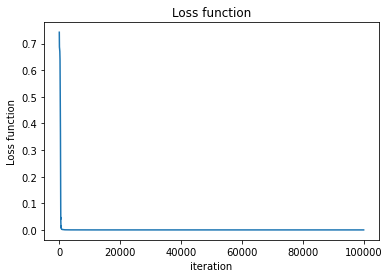

In [ ]:
net = SmallNet6(3, 4, 5, dtype=np.float64)

alpha = 0.1  # set a learning rate

# _, loss = net.forward(X3, Y3, do_backward=True)
result = np.zeros((100000,))


for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    for param_name in ["W0", "W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
    result[i] = loss

plt.title("Loss function")
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.plot(np.arange(100000), result)

print(f'Last loss value: {result[99999]}')

100%|██████████| 5/5 [37:46<00:00, 453.30s/it]


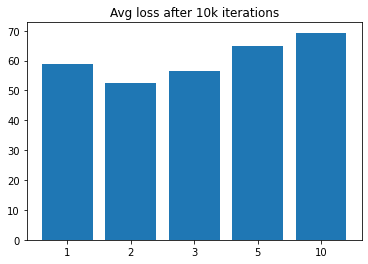

In [ ]:
alpha = 0.1  # set a learning rate

array = np.array([1, 2, 3, 5, 10])
result = np.zeros((5,))

for hidden_dim in tqdm(range(len(array))):
    for iter in range(100):
        net = SmallNet6(3, array[hidden_dim], 2, dtype=np.float64)
        for i in range(10000):
            _, loss = net.forward(X3, Y3, do_backward=True)
            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")
            for param_name in ["W0", "b1", "W1", "b2", "W2"]:
                param = getattr(net, param_name)
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
        result[hidden_dim] += loss

plt.title('Avg loss after 10k iterations')
plt.bar(array.astype(str), result)
plt.show()

100%|██████████| 5/5 [39:34<00:00, 474.93s/it]


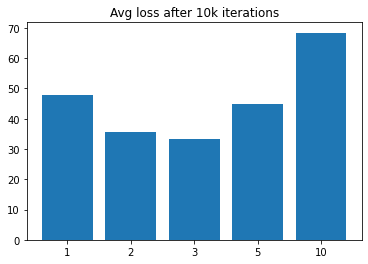

In [ ]:
alpha = 0.1  # set a learning rate

array = np.array([1, 2, 3, 5, 10])
result = np.zeros((5,))

for hidden_dim in tqdm(range(len(array))):
    for iter in range(100):
        net = SmallNet6(3, array[hidden_dim], 3, dtype=np.float64)
        for i in range(10000):
            _, loss = net.forward(X3, Y3, do_backward=True)
            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")
            for param_name in ["W0", "b1", "W1", "b2", "W2"]:
                param = getattr(net, param_name)
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
        result[hidden_dim] += loss

plt.title('Avg loss after 10k iterations')
plt.bar(array.astype(str), result)
plt.show()

100%|██████████| 5/5 [44:11<00:00, 530.34s/it]


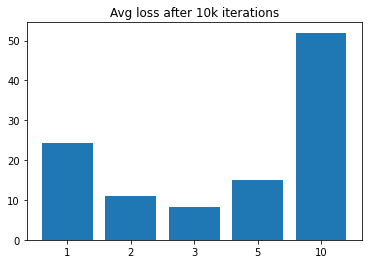

In [ ]:
alpha = 0.1  # set a learning rate

array = np.array([1, 2, 3, 5, 10])
result = np.zeros((5,))

for hidden_dim in tqdm(range(len(array))):
    for iter in range(100):
        net = SmallNet6(3, array[hidden_dim], 5, dtype=np.float64)
        for i in range(10000):
            _, loss = net.forward(X3, Y3, do_backward=True)
            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")
            for param_name in ["W0", "b1", "W1", "b2", "W2"]:
                param = getattr(net, param_name)
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
        result[hidden_dim] += loss

plt.title('Avg loss after 10k iterations')
plt.bar(array.astype(str), result)
plt.show()

 80%|████████  | 4/5 [29:49<08:54, 534.96s/it]<ipython-input-18-b6762fd23db5>:53: RuntimeWarning: divide by zero encountered in log
  loss = Y*np.log(O2) + (1-Y)*np.log(1 - O2)
<ipython-input-18-b6762fd23db5>:53: RuntimeWarning: invalid value encountered in multiply
  loss = Y*np.log(O2) + (1-Y)*np.log(1 - O2)
<ipython-input-18-b6762fd23db5>:61: RuntimeWarning: divide by zero encountered in true_divide
  O2_grad = (O2-Y)/(O2-np.square(O2)) # X x 1
<ipython-input-18-b6762fd23db5>:61: RuntimeWarning: invalid value encountered in true_divide
  O2_grad = (O2-Y)/(O2-np.square(O2)) # X x 1
<ipython-input-18-b6762fd23db5>:62: RuntimeWarning: invalid value encountered in multiply
  A2_grad = O2_grad*(sigmoid(A2)*(1 - sigmoid(A2))) # X x 1
100%|██████████| 5/5 [55:00<00:00, 660.08s/it]


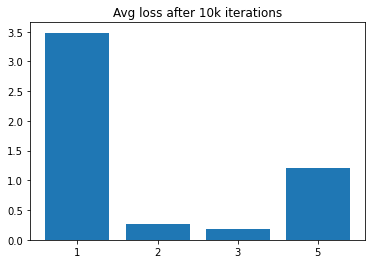

In [ ]:
alpha = 0.1  # set a learning rate

array = np.array([1, 2, 3, 5, 10])
result = np.zeros((5,))

for hidden_dim in tqdm(range(len(array))):
    for iter in range(100):
        net = SmallNet6(3, array[hidden_dim], 10, dtype=np.float64)
        for i in range(10000):
            _, loss = net.forward(X3, Y3, do_backward=True)
            # if (i % 5000) == 0:
            #     print(f"after {i} steps \tloss={loss}")
            for param_name in ["W0", "b1", "W1", "b2", "W2"]:
                param = getattr(net, param_name)
                # Hint: use the construct `param[:]` to change the contents of the array!
                # Doing instead `param = new_val` simply changes to what the variable
                # param points to, without affecting the network!
                # alternatively, you could do setattr(net, param_name, new_value)
                param[:] = param[:] - alpha*getattr(net, param_name + '_grad')
        result[hidden_dim] += loss

plt.title('Avg loss after 10k iterations')
plt.bar(array.astype(str), result)
plt.show()

## Problem 7